In [1]:
import numpy as np
import batman
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 150
from transitleastsquares import transitleastsquares
from astropy import constants
from astropy import units as u
from scipy.signal import find_peaks
from scipy import stats

test


In [47]:
transit = True
rand_per = True

iterations = 1000
ppm = 100
per_width = 6
per_min = 4
rad_width = 4.5
rad_min = .5

period = 7
radius = 1.5


if rand_per:
    trial = 'rand_period_' + str(radius) + 'R'
else:
    trial = str(period) + 'd_' + str(radius) + 'R'

transit_file = 'results_transit_' + str(ppm) + 'ppm_' + str(iterations) + 'it_' + trial
noise_file = 'results' + str(ppm) + 'ppm_' + str(iterations) + 'it'

In [48]:
transit_results = np.load(transit_file + '.npy', allow_pickle = True)
noise_results = np.load(noise_file + '.npy', allow_pickle = True)

C:\Users\ewist\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: p-value floored: true value smaller than 0.001
C:\Users\ewist\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: p-value floored: true value smaller than 0.001
C:\Users\ewist\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: p-value floored: true value smaller than 0.001
C:\Users\ewist\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: p-value floored: true value smaller than 0.001
C:\Users\ewist\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: p-value floored: true value smaller than 0.001
C:\Users\ewist\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: p-value floored: true value smaller than 0.001
C:\Users\ewist\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: p-value floored: true value smaller than 0.001
C:\Users\ewist\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: p-value floored

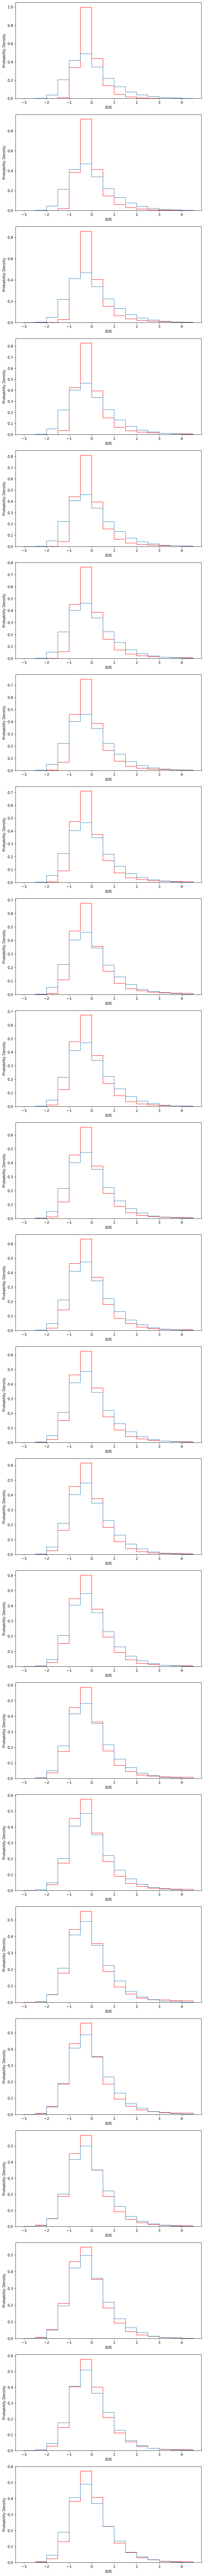

In [49]:
per_bins = np.arange(0.5,12.5,0.5)
bins = np.arange(-3,5,0.5)
ks_p_values = np.empty(len(per_bins)-1)
ad_p_values = np.empty(len(per_bins)-1)
fig, ax = plt.subplots(len(per_bins)-1,1, figsize=(8,100))
ax = ax.ravel()
for i, a in enumerate(ax):
    transit_sde = []
    periods = transit_results[i].periods
    for it in range(iterations):
        bin_power = transit_results[it].power[(periods > per_bins[i]) & (periods < per_bins[i+1])]
        transit_sde.extend(bin_power)
        #if (per_bins[i] <= transit_results[it].period <= per_bins[i+1]):
        #    transit_sde.append(transit_results[it].SDE)
            
    noise_sde = []
    periods = noise_results[i].periods
    for it in range(iterations):
        bin_power = noise_results[it].power[(periods > per_bins[i]) & (periods < per_bins[i+1])]
        noise_sde.extend(bin_power)
        #if (per_bins[i] <= noise_results[it].period <= per_bins[i+1]):
        #    noise_sde.append(noise_results[it].SDE)
        
    a.hist(transit_sde,density=True, bins= bins, color = 'r', histtype = 'step')
    a.hist(noise_sde,density=True, bins=bins, histtype = 'step')
    a.set_xlabel('SDE')
    a.set_ylabel('Probability Density')
    try:
        _, ks_p_value = stats.ks_2samp(noise_sde,transit_sde)
        ks_p_values[i] = ks_p_value
        AD, crit, sig = stats.anderson_ksamp([noise_sde,transit_sde])
        ad_p_values[i] = sig
    except:
        ks_p_values[i] = float('nan')
        ad_p_values[i] = float('nan') 
plt.tight_layout()

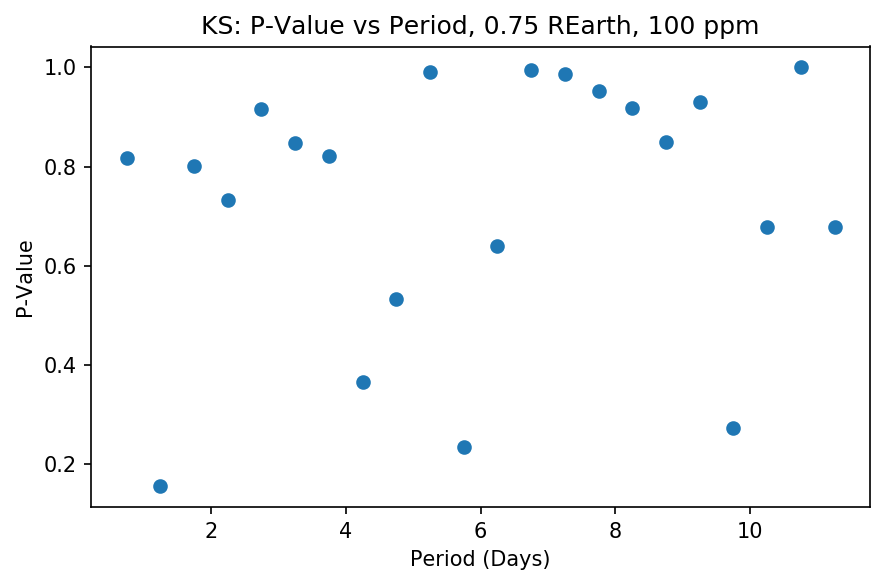

In [44]:
bin_center = per_bins[:-1] + np.diff(per_bins) / 2
plt.plot(bin_center, ks_p_values,'o')
plt.xlabel("Period (Days)")
plt.ylabel('P-Value')
plt.title('KS: P-Value vs Period, ' + str(radius) + ' REarth, 100 ppm')
plt.tight_layout()

Text(0.5, 1.0, 'AD: P-Value vs Period, 0.75 REarth, 100 ppm')

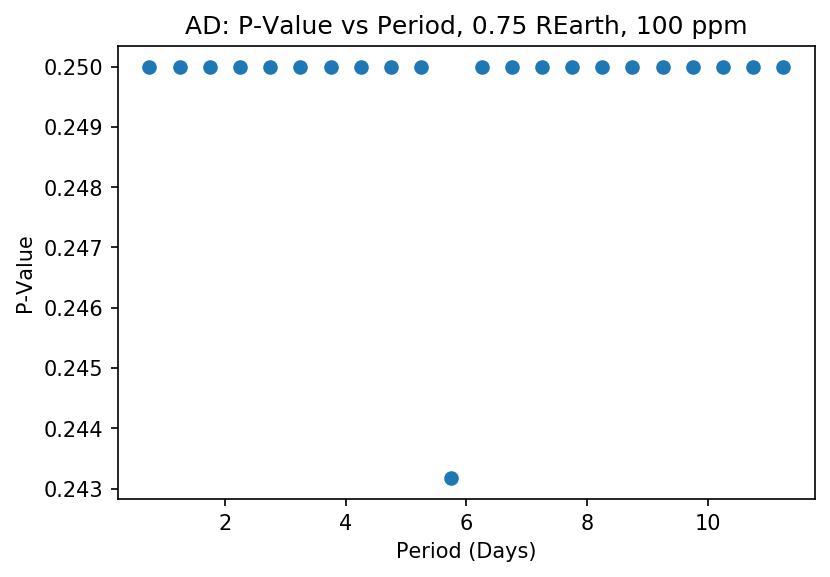

In [45]:
plt.plot(bin_center, ad_p_values,'o')
plt.xlabel("Period (Days)")
plt.ylabel('P-Value')
plt.title('AD: P-Value vs Period, ' + str(radius) + ' REarth, 100 ppm')